In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

In [11]:

def RSSI_plot (file_name, title):

    # Read data from the CSV file, ensuring that column names are stripped of leading/trailing spaces
    df_raw = pd.read_csv(file_name).rename(columns=lambda x: x.strip())

    # Ensure "RSSI" is treated as a string for proper comparison
    df_raw["RSSI"] = df_raw["RSSI"].astype(str)

    # Prepare data
    parsed_data = []

    for index, row in df_raw.iterrows():
        if "CRC error!" in row["RSSI"]:
            # Extract time and mark CRC error
            timestamp_str = row["Time"]
            parsed_data.append([np.nan, timestamp_str, True])
        else:
            # Extract RSSI and time
            rssi = float(row["RSSI"])
            timestamp_str = row["Time"]
            parsed_data.append([rssi, timestamp_str, False])

    # Convert to DataFrame
    df = pd.DataFrame(parsed_data, columns=["RSSI", "Time", "CRC_Error"])
    df["Time"] = pd.to_datetime(df["Time"])

    # Plot RSSI vs Time
    plt.figure(figsize=(10, 6))
    plt.plot(df["Time"], df["RSSI"], label="RSSI", marker='o')
    plt.xlabel("Time")
    plt.ylabel("RSSI (dBm)")
    plt.title(title)
    plt.xticks(rotation=45)

    # Highlight CRC errors
    crc_errors = df[df["CRC_Error"]]
    plt.scatter(crc_errors["Time"], [min(df["RSSI"].dropna())]*len(crc_errors), color='red', label="CRC Error", zorder=5)

    plt.legend()
    plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()


# RSSI vs Time plots (Higher RSSI is better signal integrity)
## First run with Formula car 

Here we had the receiver on the track with the car.


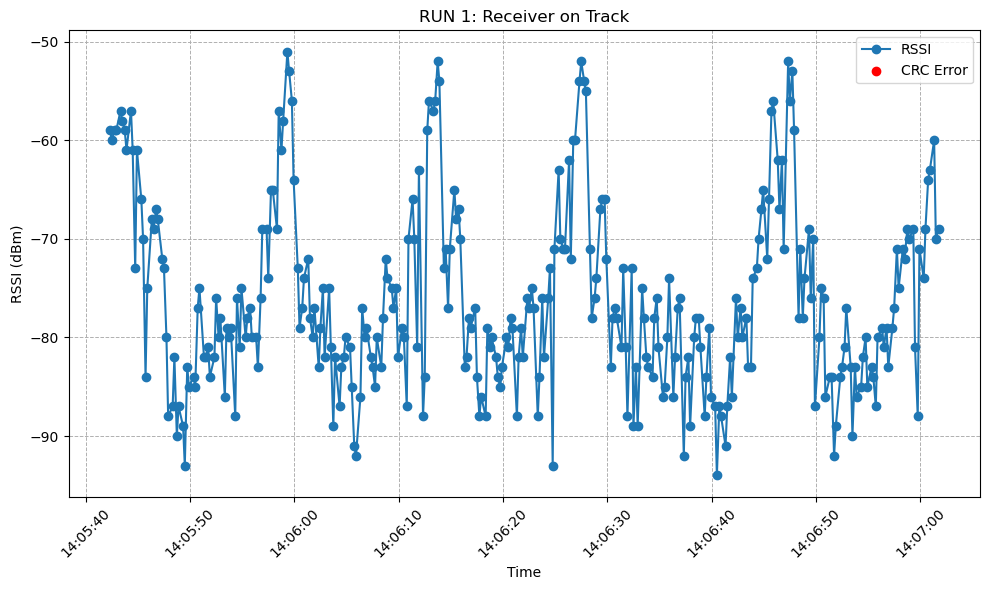

In [12]:
# SAE_RUN_1_CLOSE_SF_8
title = "RUN 1: Receiver on Track"
file_name = "SAE_RUN_1_CLOSE_SF_8.csv"
RSSI_plot(file_name, title)

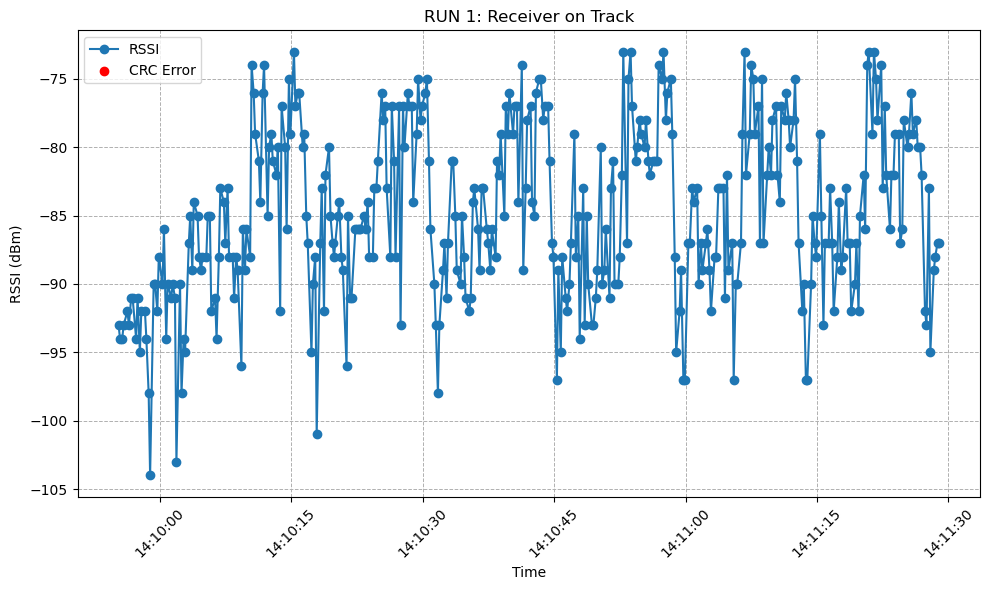

In [13]:
title = "RUN 2: Receiver on track"
file_name = "SAE_RUN_2_SF_8.csv"
RSSI_plot(file_name, title)

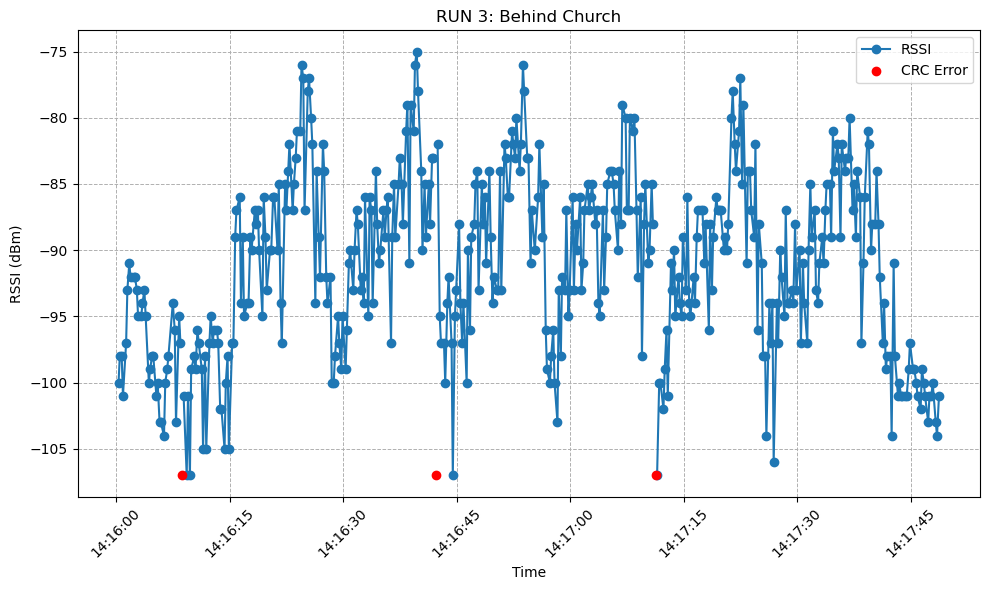

In [14]:
title = "RUN 3: Behind Church"
file_name = "SAE_RUN_3_SF_8_BEHIND_CHURCH.csv"
RSSI_plot(file_name, title)

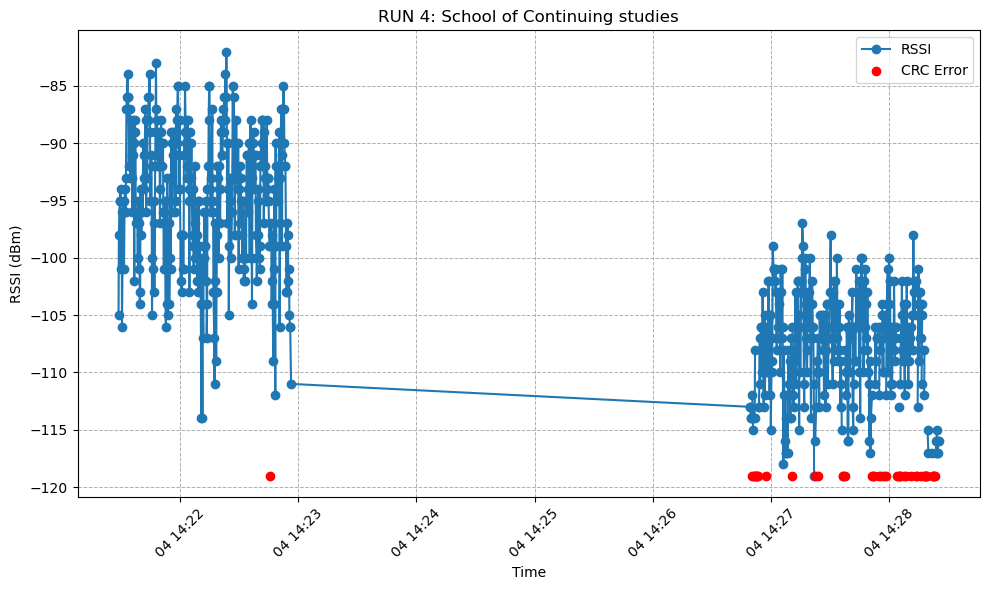

In [15]:
title = "RUN 4: School of Continuing studies"
file_name = "SAE_RUN_6_SF_9_BIG_ANTENNA_SCHOOLCONTINUINTSTUDIES.csv"
RSSI_plot(file_name, title)

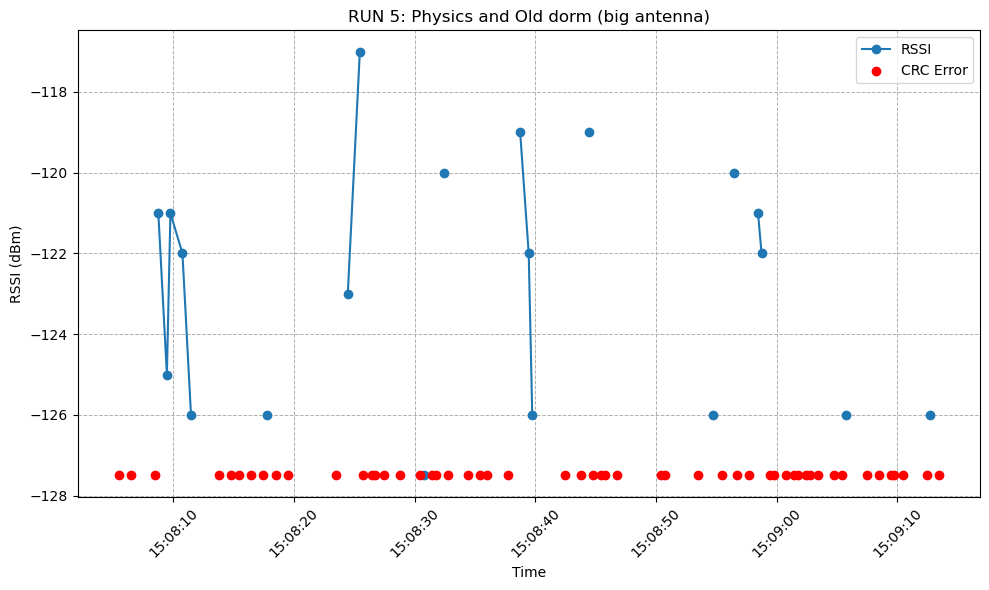

In [16]:
# RUN_7_SF_9_BIG_ANTENNA_PHYSICS_AND_OLDDORMS.csv

title = "RUN 5: Physics and Old dorm (big antenna)"
file_name = "RUN_7_SF_9_BIG_ANTENNA_PHYSICS_AND_OLDDORMS.csv"
RSSI_plot(file_name, title)

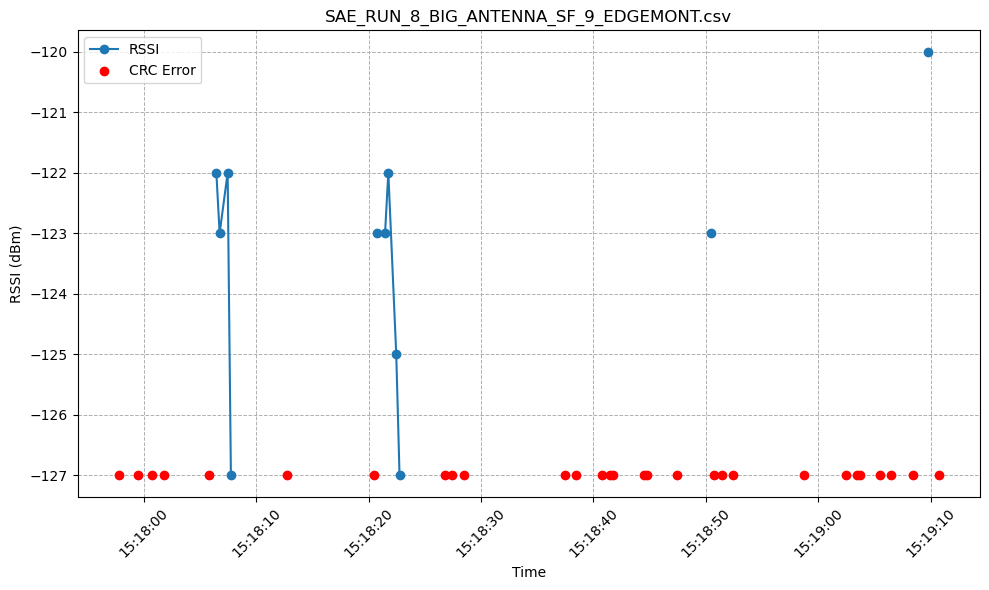

In [18]:
# SAE_RUN_8_BIG_ANTENNA_SF_9_EDGEMONT.csv

title = "SAE_RUN_8_BIG_ANTENNA_SF_9_EDGEMONT.csv"
file_name = "SAE_RUN_8_BIG_ANTENNA_SF_9_EDGEMONT.csv"
RSSI_plot(file_name, title)

In [ ]:
# Single lap isolated

